In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


# 探究CBA与snowNLP的不一致

In [3]:
text1 = pd.read_csv('lukin_2018_tag_new.csv')

In [7]:
text1['senti_cati'] = pd.Series()
text1['senti_cati'][np.where(text1['sentimate']<=0.5)[0]]=0
text1['senti_cati'][np.where(text1['sentimate']>0.5)[0]]=1

c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel pa

In [32]:
att = text1.iloc[np.where(text1['senti_cati']!=text1['tag'])[0],:]
att = att.iloc[list(~att['tag'].isnull()),:]
att

,Unnamed: 0,发布时间,微博id,用户id,用户名,正文,转发数,评论数,点赞数,用户粉丝数,用户关注数,用户推文数,用户地址,微博网址,评论,sentimate,tag,senti_cati
3,3569,2018-07-04 09:56:00,4.258000e+15,1438213863,ss李思思ss,先从口感来说，@CoffeeBox连咖啡 coffee box就已经输了，对于常年喝咖啡的同...,0,3,16,2.8万,847,4880,北京,https://weibo.com/1438213863/GokNJg4fc?refer_f...,[],9.864705e-01,0.0,1.0
10,2032,2018-05-21 09:26:00,4.242050e+15,3086565971,睡不醒的二次元小姐姐,我也算@luckincoffee瑞幸咖啡 第一批客户之一了吧，点过几次都发现同一个问题导致我...,0,4,0,382,638,1227,浙江,https://weibo.com/3086565971/GhDNR5Uea?refer_f...,[],9.643625e-01,0.0,1.0
13,12464,2018-12-14 09:29:00,4.317060e+15,6556150986,嗨够直播,今日热点百度年度搜索词报告来袭徐峥自曝20岁秃顶，既心酸又好笑共享汽车途歌被曝退押金难瑞幸咖...,0,0,1,9065,75,645,未知,https://weibo.com/6556150986/H79PnvgaG?refer_f...,[],9.999766e-01,0.0,1.0
25,12510,2018-12-17 19:26:00,4.318300e+15,5764915814,今天会成为富婆么,#luckin coffee瑞幸咖啡# 今天是个lucky的一天 ???我要lucky[小仙...,0,0,3,1225,245,589,江苏,https://weibo.com/5764915814/H7G1e97Pv?refer_f...,[],2.534497e-01,1.0,0.0
27,35,2018-01-30 11:08:00,4.201850e+15,1769076893,Sherry章,用朋友给的“新家旺财”红包买了一杯焦糖加浓美式，新发现的咖啡品牌@luckincoffee瑞...,0,0,0,7379,715,16309,上海,https://weibo.com/1769076893/G0M2dvNW7?refer_f...,[],2.064800e-01,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14677,8268,2018-10-21 15:27:00,4.297580e+15,2405436191,小ka不爱吃肉,#luckin coffee瑞幸咖啡# @luckincoffee瑞幸咖啡 西安的瑞幸终于来...,0,2,0,671,205,2479,陕西,https://weibo.com/2405436191/GEWyf980J?refer_f...,[],1.629486e-02,1.0,0.0
14680,4786,2018-08-06 14:03:00,4.270020e+15,2645598363,雨晗的快乐时光,最近越是心事重重，越是更多的想起你，想着貌似是不是该生日时送你份礼物，可又要送什么呢？耳机里...,0,0,0,111,199,796,北京,https://weibo.com/2645598363/Gtnwp3r6F?refer_f...,[],9.999979e-01,0.0,1.0
14684,5279,2018-08-16 18:29:00,4.273710e+15,2112529282,番茄没炒蛋-达叔,天津瑞幸咖啡诚聘客服人员，接听服务热线电话，受理客户咨询、业务办理等服务项目，无销售性质。薪...,0,0,0,1907,1200,20805,未知,https://weibo.com/2112529282/GuVxi5vZ2?refer_f...,[],4.523243e-08,1.0,0.0
14685,13214,2018-12-23 20:37:00,4.320490e+15,3195675032,宁波招聘栏,宁波招聘 瑞幸咖啡兼职招聘工作内容：-负责咖啡制作、外卖打包、门店清洁工作任职要求：-性别...,0,0,1,116.8万,99,178543,未知,https://weibo.com/3195675032/H8B327vN2?refer_f...,[],3.599511e-04,1.0,0.0


In [33]:
wanted = att[['正文','tag','senti_cati']]
wanted

,正文,tag,senti_cati
3,先从口感来说，@CoffeeBox连咖啡 coffee box就已经输了，对于常年喝咖啡的同...,0.0,1.0
10,我也算@luckincoffee瑞幸咖啡 第一批客户之一了吧，点过几次都发现同一个问题导致我...,0.0,1.0
13,今日热点百度年度搜索词报告来袭徐峥自曝20岁秃顶，既心酸又好笑共享汽车途歌被曝退押金难瑞幸咖...,0.0,1.0
25,#luckin coffee瑞幸咖啡# 今天是个lucky的一天 ???我要lucky[小仙...,1.0,0.0
27,用朋友给的“新家旺财”红包买了一杯焦糖加浓美式，新发现的咖啡品牌@luckincoffee瑞...,1.0,0.0
...,...,...,...
14677,#luckin coffee瑞幸咖啡# @luckincoffee瑞幸咖啡 西安的瑞幸终于来...,1.0,0.0
14680,最近越是心事重重，越是更多的想起你，想着貌似是不是该生日时送你份礼物，可又要送什么呢？耳机里...,0.0,1.0
14684,天津瑞幸咖啡诚聘客服人员，接听服务热线电话，受理客户咨询、业务办理等服务项目，无销售性质。薪...,1.0,0.0
14685,宁波招聘 瑞幸咖啡兼职招聘工作内容：-负责咖啡制作、外卖打包、门店清洁工作任职要求：-性别...,1.0,0.0


In [37]:
wanted.to_csv('disalignment_lukin_2018.csv',encoding='utf-8')

# load data with CBA tag

In [3]:
text1 = pd.read_csv('lukin_2018_tag_new.csv',index_col=1,parse_dates = ['发布时间'])
text2 = pd.read_csv('lukin_2022_tag_new.csv',index_col=1,parse_dates = ['发布时间'])
text3 = pd.read_csv('starbuck_2018_tag_new.csv',index_col=1,parse_dates = ['发布时间'])
text4 = pd.read_csv('starbuck_2022_tag_new.csv',index_col=1,parse_dates = ['发布时间'])

c:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (2,3,6,7,8,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
text2 = text2.drop(text2.index[list(np.where(text2.index=='发布时间')[0])],axis=0)
text2.index = pd.to_datetime(text2.index)

In [5]:
text3 = text3.drop(text3.index[list(np.where(text3.index=='发布时间')[0])],axis=0)
text3.index = pd.to_datetime(text3.index)

In [6]:
text4 = text4.drop(text4.index[list(np.where(text4.index=='发布时间')[0])],axis=0)
text4.index = pd.to_datetime(text4.index)

# 情感趋势按时间

In [7]:
import datetime

In [18]:
day_2018_index = []
day_2022_index = []
day_sentiment_lukin_2018_av = []
day_sentiment_lukin_2022_av = []
day_sentiment_starbuck_2018_av = []
day_sentiment_starbuck_2022_av = []
day_of_month = [31,28,31,30,31,30,31,31,30,31,30,31]
for month in range(1,13):
  #  for day in range(1,day_of_month[month-1]+1):
    target_date_begin = datetime.datetime(2018,month,1,0,0,0)
    target_date_end = datetime.datetime(2018,month,day_of_month[month-1],23,59,59)
    day_2018_index.append(datetime.date(2018,month,1))
    cur_text_1 = text1[text1.index>target_date_begin]
    cur_text_1 = cur_text_1[cur_text_1.index<target_date_end]
    day_sentiment_lukin_2018_av.append(np.where(cur_text_1['tag']==1)[0].shape[0]/cur_text_1.shape[0])
    cur_text_3 = text3[text3.index>target_date_begin]
    cur_text_3 = cur_text_3[cur_text_3.index<target_date_end]
    day_sentiment_starbuck_2018_av.append(np.where(cur_text_3['tag']==1)[0].shape[0]/cur_text_3.shape[0])
for month in range(1,9):
    target_date_begin = datetime.datetime(2022,month,1,0,0,0)
    target_date_end = datetime.datetime(2022,month,day_of_month[month-1],23,59,59)
    day_2022_index.append(datetime.date(2022,month,1))
    cur_text_2 = text2[text2.index>target_date_begin]
    cur_text_2 = cur_text_2[cur_text_2.index<target_date_end]
    day_sentiment_lukin_2022_av.append(np.where(cur_text_2['tag']==1)[0].shape[0]/cur_text_2.shape[0])
    cur_text_4 = text4[text4.index>target_date_begin]
    cur_text_4 = cur_text_4[cur_text_4.index<target_date_end]
    day_sentiment_starbuck_2022_av.append(np.where(cur_text_4['tag']==1)[0].shape[0]/cur_text_4.shape[0])

In [8]:
from scipy import interpolate

In [20]:
date_start = datetime.date(2018,1,1)
date_end = datetime.date(2018,12,31)
date_list = []
while date_start<=date_end:
    date_list.append(date_start)
    date_start+=datetime.timedelta(days=+1)

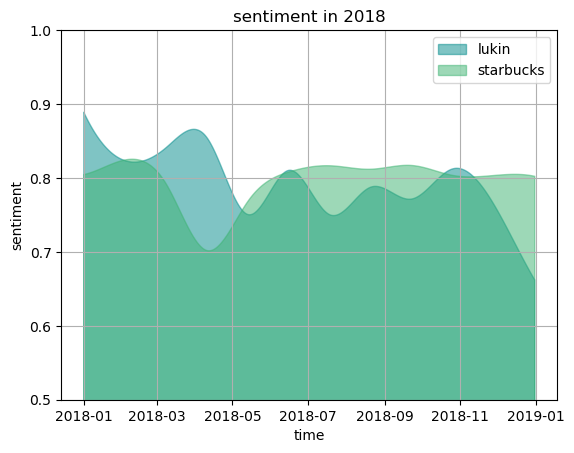

In [21]:
x= list(range(len(day_2018_index)))
xnew = np.linspace(0,11,365)
f1 = interpolate.interp1d(x,day_sentiment_lukin_2018_av,kind='cubic')
lukin_new = f1(xnew)
f2 = interpolate.interp1d(x,day_sentiment_starbuck_2018_av,kind='cubic')
starbuck_new = f2(xnew)
fig = plt.figure()
ax=fig.subplots()
line1 = ax.fill_between(date_list,lukin_new,color='darkcyan',alpha=0.5)
line2 = ax.fill_between(date_list,starbuck_new,color='mediumseagreen',alpha=0.5)
plt.ylim(0.5,1)
plt.xlabel('time')
plt.ylabel('sentiment')
plt.title('sentiment in 2018')
plt.legend([line1,line2],['lukin','starbucks'],loc='upper right')
plt.grid(True)
plt.savefig('./wordcloud/CBA_sentiment_trend_polate_2018.png')
plt.show()

In [22]:
date_start = datetime.date(2022,1,1)
date_end = datetime.date(2022,8,31)
date_list = []
while date_start<=date_end:
    date_list.append(date_start)
    date_start+=datetime.timedelta(days=+1)

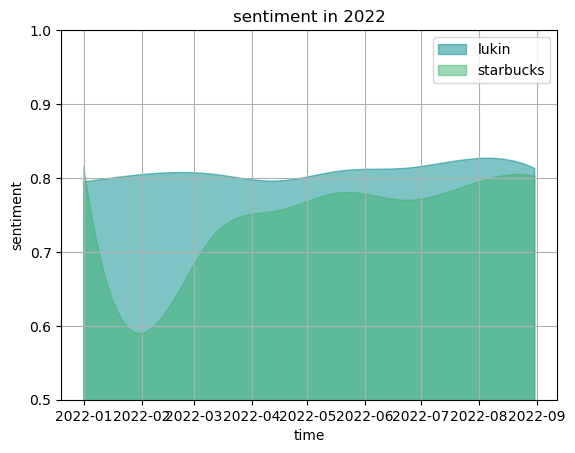

In [23]:
x= list(range(len(day_2022_index)))
xnew = np.linspace(0,7,len(date_list))
f1 = interpolate.interp1d(x,day_sentiment_lukin_2022_av,kind='cubic')
lukin_new = f1(xnew)
f2 = interpolate.interp1d(x,day_sentiment_starbuck_2022_av,kind='cubic')
starbuck_new = f2(xnew)
fig = plt.figure()
ax=fig.subplots()
line1 = ax.fill_between(date_list,lukin_new,color='darkcyan',alpha=0.5)
line2 = ax.fill_between(date_list,starbuck_new,color='mediumseagreen',alpha=0.5)
plt.ylim(0.5,1)
plt.xlabel('time')
plt.ylabel('sentiment')
plt.title('sentiment in 2022')
plt.legend([line1,line2],['lukin','starbucks'],loc='upper right')
plt.grid(True)
plt.savefig('./wordcloud/CBA_sentiment_trend_polate_2022.png')
plt.show()

In [7]:
import re
import collections

In [28]:
target_date_begin = datetime.datetime(2018,4,1,0,0,0)
target_date_end = datetime.datetime(2018,4,30,23,59,59)

low_sent1 = text3[text3.index>target_date_begin]
low_sent1 = low_sent1[low_sent1.index<target_date_end]

April = low_sent1.iloc[np.where(low_sent1['tag']==0)[0],:]

In [30]:
content = ''
for i in range(len(April['正文'])):
    content += April['正文'][i]

tag_pat = re.compile('#(.*?)#')
tag_list = tag_pat.findall(content)

word_counts = collections.Counter(tag_list) 
word_counts_top = word_counts.most_common(11)
print(word_counts_top)

[('', 156), (' ', 29), ('星巴克内未点单被逮捕', 15), ('星巴克关闭全美约8000店面', 14), ('星巴克', 11), ('星巴克致癌风波', 10), ('星巴克回应致癌风波', 8), ('星巴克咖啡致癌警告', 7), (' \u200b', 7), ('网易新闻', 6), ('星巴克致癌', 6)]


In [31]:
target_date_begin = datetime.datetime(2018,12,1,0,0,0)
target_date_end = datetime.datetime(2018,12,31,23,59,59)

low_sent1 = text1[text1.index>target_date_begin]
low_sent1 = low_sent1[low_sent1.index<target_date_end]

Dec = low_sent1.iloc[np.where(low_sent1['tag']==0)[0],:]

In [33]:
content = ''
for i in range(len(Dec['正文'])):
    content += Dec['正文'][i]

tag_pat = re.compile('#(.*?)#')
tag_list = tag_pat.findall(content)

word_counts = collections.Counter(tag_list) 
word_counts_top = word_counts.most_common(11)
print(word_counts_top)

[('瑞幸咖啡9个月巨亏超8亿', 104), ('', 14), ('瑞幸咖啡', 8), ('咖啡', 7), (' ', 6), ('新浪看点', 5), (' ?', 5), ('瑞幸咖啡B轮融资2亿美元', 4), ('瑞幸', 3), ('luckin coffee瑞幸咖啡', 3), ('网易新闻', 3)]


# 地区热力图

In [44]:
area=['河北','山西','辽宁','吉林','黑龙江','江苏','浙江','安徽','福建','江西','山东','河南','湖北','湖南','广东','海南','四川','贵州','云南','陕西','甘肃','青海','台湾','新疆','西藏','内蒙古','广西','宁夏','北京','天津','上海','重庆','中国台湾','中国香港','中国澳门']

In [45]:
cur_area = []
senti_area = []
for i in range(len(area)):
    tar = text1.iloc[np.where(text1['用户地址']==area[i])[0],:]
    if tar.shape[0]!=0:
        senti_area.append(np.where(tar['tag']==1)[0].shape[0]/tar.shape[0])
        cur_area.append(area[i])


In [1]:
from pyecharts import options as opts
from pyecharts.charts import BMap
from pyecharts.faker import Faker

In [10]:
from pyecharts.charts import Map

In [47]:
c = (
    BMap()
    .add_schema(baidu_ak="FAKE_AK", center=[120.13066322374, 30.240018034923])
    .add(
        "bmap",
        [list(z) for z in zip(cur_area, senti_area)],
        type_="heatmap",
        label_opts=opts.LabelOpts(formatter="{b}"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="BMap-热力图"), visualmap_opts=opts.VisualMapOpts(max_=1)
    )
    .render("lukin_2018_bmap_heatmap.html")
)

In [48]:
c = (
    Map(init_opts = opts.InitOpts(width="1200px", height="741.6px"))
    .add(
        'map',
        # 按顺序：省份名字及其值
        [list(z) for z in zip(cur_area, senti_area)],
        # 放在哪个地图上
        "china",
        # 是否在每个行政区上面显示这个行政区的名字
        label_opts=opts.LabelOpts(is_show=True),
        is_map_symbol_show = False,
    )
    .set_global_opts(
        # 设置热力图中的最大值是多少
        visualmap_opts=opts.VisualMapOpts(max_=1, is_piecewise=True),
    )
    # 保存，以及文件名
    .render("lukin_2018_map_china_cities.html")
)

In [49]:
cur_area = []
senti_area = []
for i in range(len(area)):
    tar = text2.iloc[np.where(text2['用户地址']==area[i])[0],:]
    if tar.shape[0]!=0:
        senti_area.append(np.where(tar['tag']==1)[0].shape[0]/tar.shape[0])
        cur_area.append(area[i])

In [50]:
c = (
    Map(init_opts = opts.InitOpts(width="1200px", height="741.6px"))
    .add(
        'map',
        # 按顺序：省份名字及其值
        [list(z) for z in zip(cur_area, senti_area)],
        # 放在哪个地图上
        "china",
        # 是否在每个行政区上面显示这个行政区的名字
        label_opts=opts.LabelOpts(is_show=True),
        is_map_symbol_show = False,
    )
    .set_global_opts(
        # 设置热力图中的最大值是多少
        visualmap_opts=opts.VisualMapOpts(max_=1, is_piecewise=True),
    )
    # 保存，以及文件名
    .render("lukin_2022_map_china_cities.html")
)

In [51]:
cur_area = []
senti_area = []
for i in range(len(area)):
    tar = text3.iloc[np.where(text3['用户地址']==area[i])[0],:]
    if tar.shape[0]!=0:
        senti_area.append(np.where(tar['tag']==1)[0].shape[0]/tar.shape[0])
        cur_area.append(area[i])

In [52]:
c = (
    Map(init_opts = opts.InitOpts(width="1200px", height="741.6px"))
    .add(
        'map',
        # 按顺序：省份名字及其值
        [list(z) for z in zip(cur_area, senti_area)],
        # 放在哪个地图上
        "china",
        # 是否在每个行政区上面显示这个行政区的名字
        label_opts=opts.LabelOpts(is_show=True),
        is_map_symbol_show = False,
    )
    .set_global_opts(
        # 设置热力图中的最大值是多少
        visualmap_opts=opts.VisualMapOpts(max_=1, is_piecewise=True),
    )
    # 保存，以及文件名
    .render("starbuck_2018_map_china_cities.html")
)

In [53]:
cur_area = []
senti_area = []
for i in range(len(area)):
    tar = text4.iloc[np.where(text4['用户地址']==area[i])[0],:]
    if tar.shape[0]!=0:
        senti_area.append(np.where(tar['tag']==1)[0].shape[0]/tar.shape[0])
        cur_area.append(area[i])

In [56]:
c = (
    Map(init_opts = opts.InitOpts(width="1200px", height="741.6px"))
    .add(
        'map',
        # 按顺序：省份名字及其值
        [list(z) for z in zip(cur_area, senti_area)],
        # 放在哪个地图上
        "china",
        # 是否在每个行政区上面显示这个行政区的名字
        label_opts=opts.LabelOpts(is_show=True),
        is_map_symbol_show = False,
    )
    .set_global_opts(
        # 设置热力图中的最大值是多少
        visualmap_opts=opts.VisualMapOpts(max_=1, is_piecewise=True),
    )
    # 保存，以及文件名
    .render("starbuck_2022_map_china_cities.html")
)

In [ ]:
tar = text1.iloc[np.where(text1['用户地址']=='贵州')[0],:]

In [65]:
tar['正文'][8]

'#贵阳身边事# 【男子身无分文迷路13天，烤玉米生炊烟时幸被路政员发现】9月13日，毕节高速公路管理处路政员巡查至杭瑞高速（G56）K1732+800下行时，发现路旁的桥头飘起一缕炊烟。路政员查看后发现，一名四十多岁、衣衫褴褛的男子正在烤玉米吃。原来，男子来自云南昭通，半个月前从老家出来准备去湖南务 ?  展开c'

In [62]:
tar.shape

(23, 16)

In [67]:
tar = text3.iloc[np.where(text3['用户地址']=='青海')[0],:]

In [68]:
tar['正文']

发布时间
2018-07-10 11:29:00    终于等到你刷爆抖音的网红奶茶鹿角巷首家入驻西宁，强势来袭！力盟国芳百货星巴克对面北家姓美食广...
2018-01-30 10:57:00    【女子寻刺激专偷星巴克杯子：家有多辆豪车】近日，杭州一女子在星巴克顺走店内在售的杯子。民警找...
2018-03-17 17:52:00    [#沫沫信息#][广告]回想整个冬天不管秋膘冬膘都贴的hin成功呀眼睛一闭一睁，体重就上去了...
2018-03-24 17:48:00    [#沫沫信息#][广告]回想整个冬天不管秋膘冬膘都贴的hin成功呀眼睛一闭一睁，体重就上去了...
2018-01-19 14:34:00    [#沫友吐槽#]我今天吐个槽！纺织品楼上有个一个猫咖，我和朋友逛街，走累了，去那点个东西喝，...
                                             ...                        
2018-11-15 16:53:00       西宁打听 有没有在淘宝买过星巴克星享卡的小伙伴呢，怎么样，好用吗谢谢  via@瑞倪啊 ​
2018-09-19 12:57:00    香格里拉6期【虎台中学+北大街小学】学区房，南川片区最大的商业区，未来的又一海湖新区即将出现...
2018-07-17 17:53:00    【牵手阿里，能给星巴克带来什么？】“有一天星巴克在中国的市场会反超美国”…@虎嗅APP O牵...
2018-04-03 17:55:00                        非常想—喝星巴克、吃炸鸡.very very very ​
2018-04-04 17:55:00    [#沫沫信息#][广告]回想整个冬天不管秋膘冬膘都贴的hin成功呀眼睛一闭一睁，体重就上去了...
Name: 正文, Length: 88, dtype: object